# Tarea - Ajuste de curvas

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación Matématica. 

**Nombre:** Hugo Gabriel Velarde Pérez.
    
**Fecha:** 27 de Febrero del 2022.

**Expediente** : IF730799


    
   
**Profesor:** Gabriel Alejandro Morales Ruiz.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [2]:
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

In [3]:
i = np.arange(27)

df = pd.DataFrame(index=i,columns=['Año', 'Costo electricidad'])

df['Año'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
df['Costo electricidad'] = [10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149]
df.head(5)

,Año,Costo electricidad
0,1,10.051101
1,2,9.259127
2,3,9.444813
3,4,9.557723
4,5,9.977324


In [4]:
df["Costo electricidad"].min()

9.259127

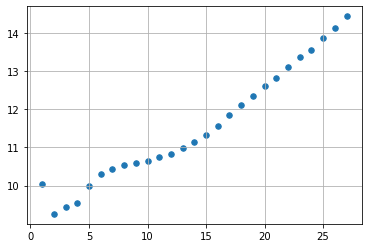

In [5]:
x = df["Año"]
y = df["Costo electricidad"]
plt.figure()
plt.scatter(x, y, s=30)
plt.grid()

In [6]:
data.shape

(27,)

In [7]:
def funcion_de_costo_1(theta, x, y):
    prediccion = (theta[0] + theta[1]*x)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_costo_1,
                  theta_inicial_1,
                  args=(x, y)) 
#los argumentos son los que estan des:pues de theta en la funcion de costo

costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 2.370488951814611
 hess_inv: array([[ 0.07834758, -0.0042735 ],
       [-0.0042735 ,  0.00030525]])
      jac: array([-6.02006912e-06,  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([8.92900535, 0.18667058])

In [8]:
def funcion_de_costo_2(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_costo_2,
                  theta_inicial_2,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 0.8443845212483811
 hess_inv: array([[ 1.94416499e-01, -2.82636937e-02,  8.56463859e-04],
       [-2.82636937e-02,  5.26520832e-03, -1.77093192e-04],
       [ 8.56463859e-04, -1.77093192e-04,  6.32330717e-06]])
      jac: array([4.69386578e-06, 7.80597329e-05, 1.72143430e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 228
      nit: 8
     njev: 54
   status: 2
  success: False
        x: array([9.52314643e+00, 6.37449197e-02, 4.39020129e-03])

In [9]:
def funcion_de_costo_3(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_costo_3,
                  theta_inicial_3,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 0.8404493234033887
 hess_inv: array([[ 3.96856557e-01, -1.07903549e-01,  7.84071039e-03,
        -1.66308241e-04],
       [-1.07903549e-01,  3.65835347e-02, -2.92318360e-03,
         6.53836529e-05],
       [ 7.84071039e-03, -2.92318360e-03,  2.47091950e-04,
        -5.73241133e-06],
       [-1.66308241e-04,  6.53836529e-05, -5.73241133e-06,
         1.36478930e-07]])
      jac: array([-3.61889601e-04, -6.37598336e-04,  5.41880727e-05,  3.52509320e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 227
      nit: 6
     njev: 43
   status: 2
  success: False
        x: array([9.48685118e+00, 7.80049486e-02, 3.14024913e-03, 2.97560686e-05])

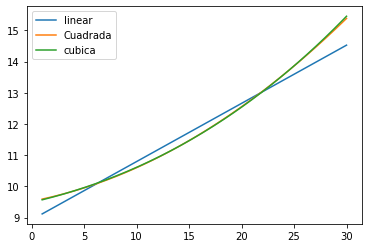

In [10]:
xn = np.linspace(1, 30, 200)
yn1 = resultados_1[0]  + resultados_1[1]*xn
yn2 = resultados_2[0]  + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]  + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
#plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="linear")
plt.plot(xn, yn2, label="Cuadrada")
plt.plot(xn, yn3, label="cubica")
plt.legend(loc="best")

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

In [11]:
data = pd.read_csv('population_data.csv')
data.head()

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752


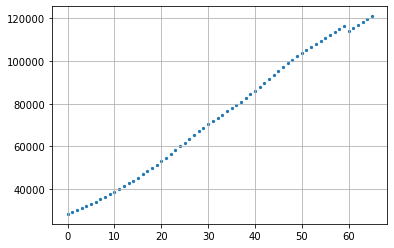

In [21]:
x = data["Year"] - 1950
y = data["Poblacion"]
plt.figure()
plt.scatter(x, y, s=5)
plt.grid()

# modelo = a*sin(x) + b*ln(x) + c*e^x + d*x^4 + e

In [29]:
def funcion_de_poblacion_1(theta, x, y):
    prediccion = (theta[0] + theta[1]*x)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_poblacion_1,
                  theta_inicial_1,
                  args=(x, y)) 
#los argumentos son los que estan des:pues de theta en la funcion de costo

costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 212137169.5467449
 hess_inv: array([[ 1.52651453e-02, -3.52406036e-04],
       [-3.52406036e-04,  1.34782871e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 8
     njev: 28
   status: 0
  success: True
        x: array([24138.02791836,  1543.97312894])

In [23]:
def funcion_de_poblacion_2(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_poblacion_2,
                  theta_inicial_2,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 210941621.46125606
 hess_inv: array([[ 1.67603941e-01, -1.11915575e-02,  1.48451364e-04],
       [-1.11915575e-02,  8.41904980e-04, -1.17179404e-05],
       [ 1.48451364e-04, -1.17179404e-05,  1.68011319e-07]])
      jac: array([0., 0., 2.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 288
      nit: 10
     njev: 69
   status: 2
  success: False
        x: array([2.44255470e+04, 1.51701565e+03, 4.14742784e-01])

In [24]:
def funcion_de_poblacion_3(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_poblacion_3,
                  theta_inicial_3,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 25240442.644999422
 hess_inv: array([[ 5.87963200e-02, -6.49227842e-03,  1.94614218e-04,
        -1.71405334e-06],
       [-6.49227842e-03,  1.20930109e-03, -4.40587016e-05,
         4.30589391e-07],
       [ 1.94614218e-04, -4.40587016e-05,  1.75331133e-06,
        -1.80650501e-08],
       [-1.71405334e-06,  4.30589391e-07, -1.80650501e-08,
         1.92620632e-10]])
      jac: array([0.  , 0.25, 0.25, 0.5 ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 8
     njev: 42
   status: 2
  success: False
        x: array([ 2.84777748e+04,  7.39077108e+02,  3.05649346e+01, -3.09232424e-01])

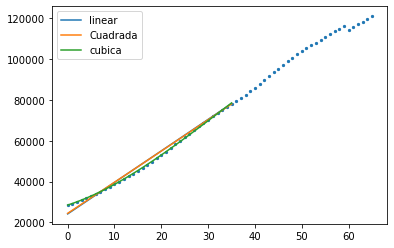

In [25]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0]  + resultados_1[1]*xn
yn2 = resultados_2[0]  + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]  + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="linear")
plt.plot(xn, yn2, label="Cuadrada")
plt.plot(xn, yn3, label="cubica")
plt.legend(loc="best")

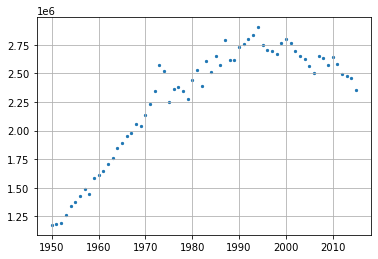

In [33]:
x = data["Year"] - 1950
y = data["Nacimientos"]
plt.figure()
plt.scatter(x + 1950, y, s=5)
plt.grid()

In [34]:
def funcion_de_poblacion_a_nacimientos_1(theta, x, y):
    prediccion = (theta[0] + theta[1]*x)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_1 = np.random.rand(2)
sol = opt.minimize(funcion_de_poblacion_a_nacimientos_1,
                  theta_inicial_1,
                  args=(x, y)) 
#los argumentos son los que estan des:pues de theta en la funcion de costo

costo_1 = sol.fun
resultados_1 = sol.x
sol

      fun: 4737941619063.114
 hess_inv: array([[ 2.84952418e-02, -6.52723987e-04],
       [-6.52723987e-04,  2.02891576e-05]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 6
     njev: 15
   status: 0
  success: True
        x: array([1564311.02678309,   21946.17001765])

In [35]:
def funcion_de_poblacion_a_nacimientos_2(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_2 = np.random.rand(3)
sol = opt.minimize(funcion_de_poblacion_a_nacimientos_2,
                  theta_inicial_2,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_2 = sol.fun
resultados_2 = sol.x
sol

      fun: 492921049265.9473
 hess_inv: array([[ 4.46082872e-02, -2.86589680e-03,  3.73828548e-05],
       [-2.86589680e-03,  2.69371316e-04, -4.02994191e-06],
       [ 3.73828548e-05, -4.02994191e-06,  6.45058781e-08]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 152
      nit: 10
     njev: 38
   status: 0
  success: True
        x: array([ 1.02111177e+06,  7.27775645e+04, -7.81556647e+02])

In [36]:
def funcion_de_poblacion_a_nacimientos_3(theta, x, y):
    prediccion = (theta[0] + theta[1]*x + theta[2]*x**2 + theta[3]*x**3)
    error = y - prediccion
    error_2 = error**2
    return np.sum(error_2)

theta_inicial_3 = np.random.rand(4)
sol = opt.minimize(funcion_de_poblacion_a_nacimientos_3,
                  theta_inicial_3,
                  args=(x, y)) 
#los argumentos son los que estan despues de theta en la funcion de costo

costo_3 = sol.fun
resultados_3 = sol.x
sol

      fun: 441782331359.83746
 hess_inv: array([[ 1.05634237e-01, -1.20721758e-02,  3.68900363e-04,
        -3.28310282e-06],
       [-1.20721758e-02,  1.90925871e-03, -6.64505307e-05,
         6.34769117e-07],
       [ 3.68900363e-04, -6.64505307e-05,  2.47709458e-06,
        -2.47007415e-08],
       [-3.28310282e-06,  6.34769117e-07, -2.47007415e-08,
         2.53629227e-10]])
      jac: array([      0.,       0.,   20480., 1273856.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 222
      nit: 8
     njev: 42
   status: 2
  success: False
        x: array([ 1.08830226e+06,  5.98753475e+04, -2.81461600e+02, -5.12946128e+00])

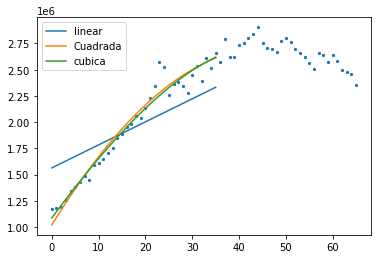

In [37]:
xn = np.linspace(0, 35, 200)
yn1 = resultados_1[0]  + resultados_1[1]*xn
yn2 = resultados_2[0]  + resultados_2[1]*xn + resultados_2[2]*xn**2
yn3 = resultados_3[0]  + resultados_3[1]*xn + resultados_3[2]*xn**2 + resultados_3[3]*xn**3

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x, y, s=5)
plt.plot(xn, yn1, label="linear")
plt.plot(xn, yn2, label="Cuadrada")
plt.plot(xn, yn3, label="cubica")
plt.legend(loc="best")

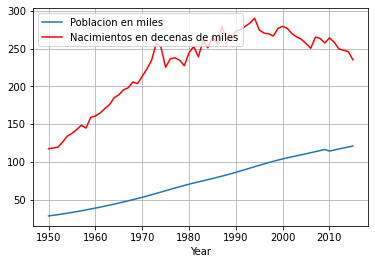

In [17]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---